<a href="https://colab.research.google.com/github/Reyhaneh2001/DeepFashion/blob/main/DeepFashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler

# **Load dataset and show some images**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


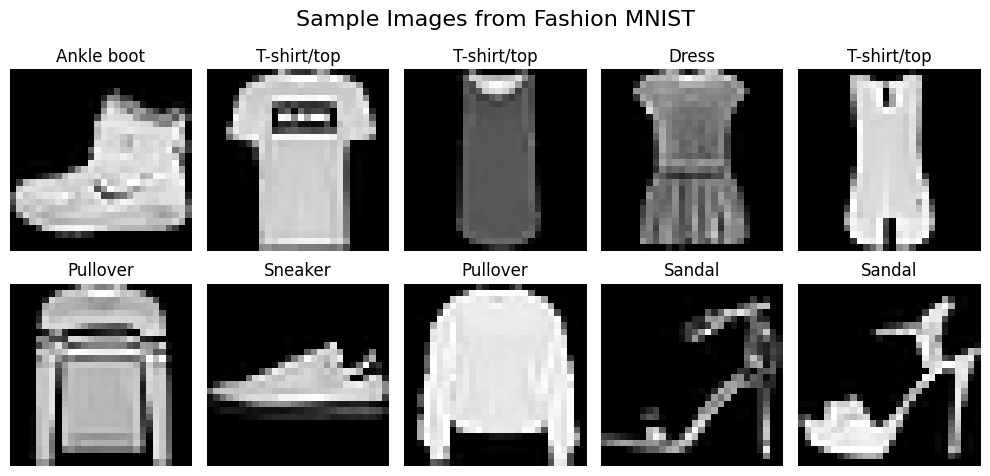

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Visualize Some Images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.suptitle("Sample Images from Fashion MNIST", fontsize=16)
plt.tight_layout()
plt.show()

# **Distribution of classes**

<ipython-input-11-15f0d8fbf935>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=label_counts.values, palette='viridis')


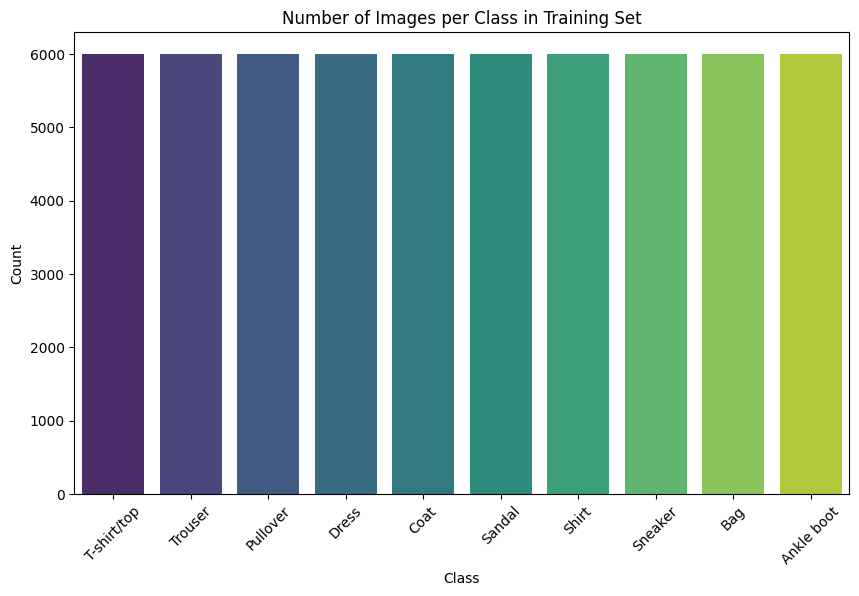

In [11]:
label_counts = pd.Series(y_train).value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=class_names, y=label_counts.values, palette='viridis')
plt.title("Number of Images per Class in Training Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# **Preprocessing**

In [3]:
# Reshape and scale
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# **Build, compile and fit functional model**

In [4]:
input_layer = Input(shape=(28,28,1))

x = Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

output_layer = Dense(10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,538 (1.61 MB)

 Trainable params: 422,090 (1.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [5]:
# Callbacks
es = EarlyStopping(patience=5, restore_best_weights=True, verbose=1)
mc = ModelCheckpoint('best_model.h5', save_best_only=True)

# Training
history = model.fit(
    x_train, y_train_cat,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    callbacks=[es, mc],
    verbose=1
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.7573 - loss: 0.7278

750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 109ms/step - accuracy: 0.7574 - loss: 0.7275 - val_accuracy: 0.8678 - val_loss: 0.3558
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8707 - loss: 0.3689

750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 111ms/step - accuracy: 0.8707 - loss: 0.3689 - val_accuracy: 0.8989 - val_loss: 0.2719
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8897 - loss: 0.3114

750/750 ━━━━━━━━━━━━━━━━━━━━ 139s 107ms/step - accuracy: 0.8897 - loss: 0.3114 - val_accuracy: 0.9097 - val_loss: 0.2566
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 107ms/step - accuracy: 0.8985 - loss: 0.2834 - val_accuracy: 0.9053 - val_loss: 0.2578
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9044 - loss: 0.2656

750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 106ms/step - accuracy: 0.9044 - loss: 0.2656 - val_accuracy: 0.9137 - val_loss: 0.2292
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.9085 - loss: 0.2559 - val_accuracy: 0.9181 - val_loss: 0.2332
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 106ms/step - accuracy: 0.9131 - loss: 0.2400 - val_accuracy: 0.9150 - val_loss: 0.2405
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9139 - loss: 0.2348

750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 111ms/step - accuracy: 0.9139 - loss: 0.2348 - val_accuracy: 0.9176 - val_loss: 0.2283
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 106ms/step - accuracy: 0.9178 - loss: 0.2247 - val_accuracy: 0.8926 - val_loss: 0.3123
Epoch 10/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9182 - loss: 0.2242

750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 109ms/step - accuracy: 0.9182 - loss: 0.2242 - val_accuracy: 0.9207 - val_loss: 0.2142
Epoch 11/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.9217 - loss: 0.2112 - val_accuracy: 0.9182 - val_loss: 0.2281
Epoch 12/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.9273 - loss: 0.1998 - val_accuracy: 0.9214 - val_loss: 0.2208
Epoch 13/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9278 - loss: 0.2013

750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 108ms/step - accuracy: 0.9278 - loss: 0.2013 - val_accuracy: 0.9238 - val_loss: 0.2110
Epoch 14/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9278 - loss: 0.1962

750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.9278 - loss: 0.1962 - val_accuracy: 0.9232 - val_loss: 0.2060
Epoch 15/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 107ms/step - accuracy: 0.9301 - loss: 0.1914 - val_accuracy: 0.9268 - val_loss: 0.2075
Epoch 16/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9317 - loss: 0.1866

750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 107ms/step - accuracy: 0.9317 - loss: 0.1866 - val_accuracy: 0.9277 - val_loss: 0.1987
Epoch 17/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 106ms/step - accuracy: 0.9304 - loss: 0.1853 - val_accuracy: 0.9198 - val_loss: 0.2158
Epoch 18/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 108ms/step - accuracy: 0.9335 - loss: 0.1804 - val_accuracy: 0.9108 - val_loss: 0.2627
Epoch 19/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 107ms/step - accuracy: 0.9354 - loss: 0.1749 - val_accuracy: 0.9298 - val_loss: 0.2017
Epoch 20/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 106ms/step - accuracy: 0.9376 - loss: 0.1687 - val_accuracy: 0.9293 - val_loss: 0.2000
Epoch 21/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 106ms/step - accuracy: 0.9392 - loss: 0.1639 - val_accuracy: 0.9298 - val_loss: 0.2089
Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 16.


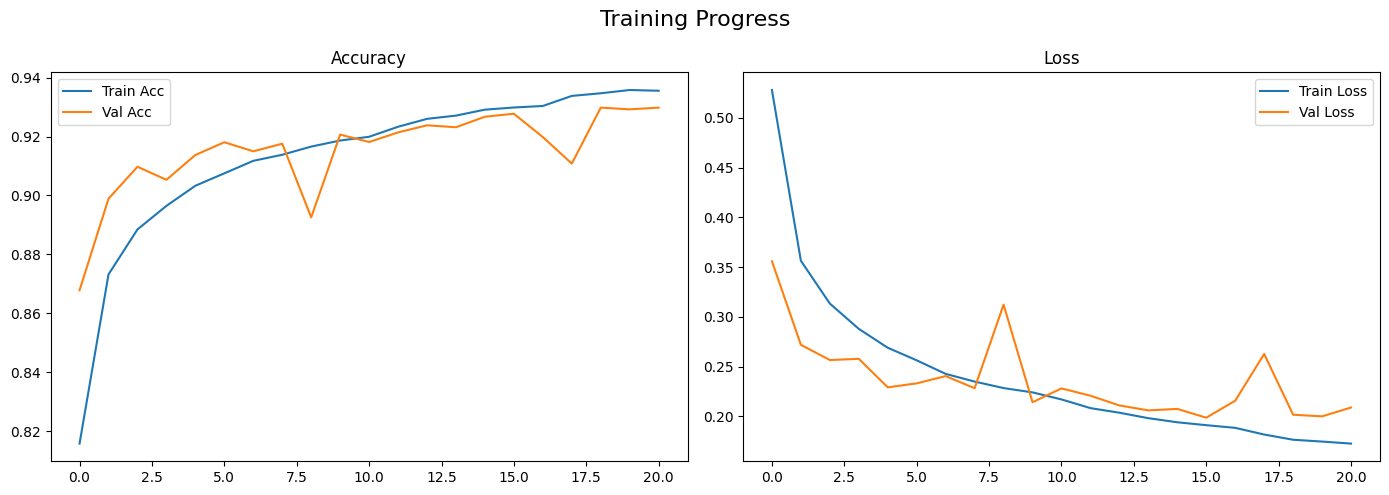

In [6]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.suptitle("Training Progress", fontsize=16)
plt.tight_layout()
plt.show()

# **Evaluate on test set**

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9222


# **Confusion Matrix & Report**

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


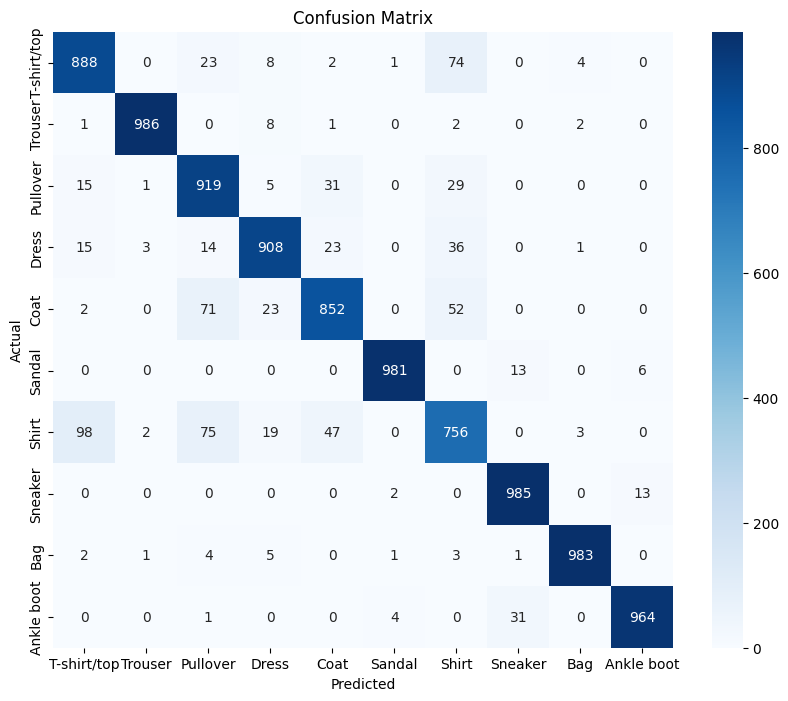


Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.89      0.88      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.83      0.92      0.87      1000
       Dress       0.93      0.91      0.92      1000
        Coat       0.89      0.85      0.87      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.79      0.76      0.77      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [8]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=class_names))